# **Credit Card Fraud Detection**

Using  Decision Tree and Support Vector Machine classification models to recognize fraudulent credit card transactions.


## Import libraries

In [43]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from snapml import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC
import time
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')

### Download dataset

In [2]:
# install the opendatasets package
!pip install opendatasets

import opendatasets as od

# download the dataset (this is a Kaggle dataset)
# during download you will be required to input your Kaggle username and password
od.download("https://www.kaggle.com/mlg-ulb/creditcardfraud")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  kelvinmusodza


Your Kaggle Key:

  ········


  8%|▊         | 5.00M/66.0M [00:00<00:01, 39.3MB/s]

100%|██████████| 66.0M/66.0M [00:02<00:00, 24.3MB/s]

In [3]:
# Snap ML is available on PyPI
!pip install snapml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 45.5 MB/s eta 0:00:0000:0100:01


## Dataset Analysis

In [8]:
# read data with pandas dataFrame
raw_data = pd.read_csv('creditcardfraud/creditcard.csv')
print("There are " + str(len(raw_data)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")

# display the first rows in the dataset
raw_data.head()

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# inflate data 10 times
n_replicas = 10

# inflate the original dataset
big_raw_data = pd.DataFrame(np.repeat(raw_data.values, n_replicas, axis=0), columns=raw_data.columns)

print("There are " + str(len(big_raw_data)) + " observations in the inflated credit card fraud dataset.")
print("There are " + str(len(big_raw_data.columns)) + " variables in the dataset.")

# display first rows in the new dataset
big_raw_data.head()


There are 2848070 observations in the inflated credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


A credit card transaction is represented by each row in the dataset. Each row has 31 variables, as seen above. The target variable is represented by a single variable called Class, which is the last element in the table above. will develop a model that forecasts the value of the Class variable using the independent variables.

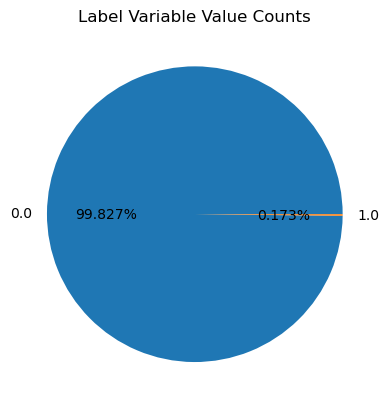

In [10]:
# get the set of distinct classes
labels = big_raw_data.Class.unique()

# get the count of each class
sizes = big_raw_data.Class.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Label Variable Value Counts')
plt.show()


### Observation
As shown above the dataset is highly unbalanced and will need some tunining when training and evaluating the quality of the model. 

__Will bias the model to pay attention to the samples in the minority class, configure it to take into account the class weights of the samples at train/fit time__

Show the distrubution of credit card amounts and The range

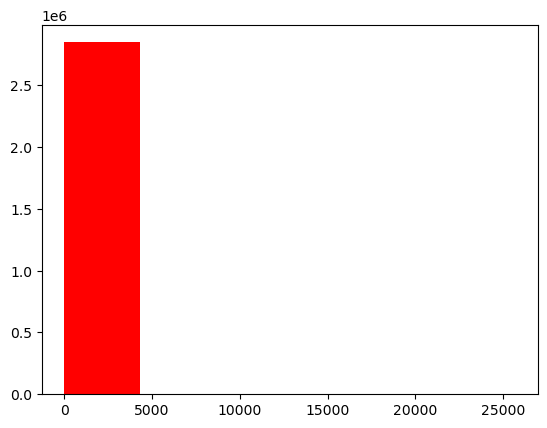

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


In [11]:
plt.hist(big_raw_data.Amount.values, 6, histtype='bar', facecolor='r')
plt.show()

print("Minimum amount value is ", np.min(big_raw_data.Amount.values))
print("Maximum amount value is ", np.max(big_raw_data.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(raw_data.Amount.values, 90))

## Data preprocessing

In [12]:
# Scale/normalize the data to accelerate the training convergence

# standardize features by removing the mean and scaling to unit variance
big_raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(big_raw_data.iloc[:, 1:30])
data_matrix = big_raw_data.values

# data: feature matrix, will exclude the time variable from the dataset
data = data_matrix[:, 1:30]

# labels:  labels vector
labels = data_matrix[:, 30]

# data normiliztion
data = normalize(data, norm="l1")

# print the shape of the features matrix and labels
print(' Data shape: {}\n Labels shape: {}'.format(data.shape, labels.shape))

 Data shape: (2848070, 29)
 Labels shape: (2848070,)


### Train/Test Split

In [44]:
data_train, data_test, labels_train, labels_test = train_test_split(data,labels, test_size=0.3, random_state=42, stratify=labels)
print('Data_train.shape=', data_train.shape, 'Labels_train.shape=', labels_train.shape)
print('Data_test.shape=', data_test.shape, 'Labels_test.shape=', labels_test.shape)

Data_train.shape= (1993649, 29) Labels_train.shape= (1993649,)
Data_test.shape= (854421, 29) Labels_test.shape= (854421,)


## Build decision tree
The model will be trained using sample weights that take into account the class imbalance in the dataset.

In [45]:
# compute  sample weights
w_train = compute_sample_weight('balanced', labels_train)

# for reproducible output across multiple function calls, set random_state to a given integer value
clf_tree = DecisionTreeClassifier(max_depth=4, random_state=35)

t0 = time.time()
clf_tree.fit(data_train, labels_train, sample_weight=w_train)
clf_time = time.time()-t0
print(" Training time (s): {0:.5f}".format(clf_time))


 Training time (s): 9.74943


<!-- <div id="dt_snapml">
    <h4>Build a Decision Tree Classifier model with Snap ML</h4>
</div> -->


In [16]:
# # Snap ML offers multi-threaded CPU/GPU training of decision trees, unlike scikit-learn
# snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, use_gpu=True)

# # to set the number of CPU threads used at training time, set the n_jobs parameter
# # for reproducible output across multiple function calls, set random_state to a given integer value
# snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, n_jobs=4)

# # train a Decision Tree Classifier model using Snap ML
# t0 = time.time()
# snapml_dt.fit(data_train, labels_train, sample_weight=w_train)
# snapml_time = time.time()-t0
# print("[Snap ML] Training time (s):  {0:.5f}".format(snapml_time))

<div id="dt_sklearn_snapml">
    <h3>Evaluate the Decision Tree Classifier Model</h3>
</div>


In [50]:
# run inference and get probability of fraud in test samples
clf_tree_pred = clf_tree.predict_proba(data_test)[:,1]

# evaluate the Compute Area Under the Receiver Operating Characteristic
# Curve (ROC-AUC) score from the predictions
clf_tree_roc_auc = roc_auc_score(labels_test, clf_tree_pred)
print(' ROC-AUC score : {0:.3f}'.format(clf_tree_roc_auc))

 ROC-AUC score : 0.966


<div id="svm_sklearn">
    <h2>Build a Support Vector Machine model</h2>
</div>

In [51]:
# indicate the class imbalance at fit time
# set random_state for reproducible output across multiple function calls
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

# train linear support vector machine
t1 = time.time()
svm.fit(data_train, labels_train)
svm_time = time.time() - t1
print(" Training time (s):  {0:.2f}".format(svm_time))

 Training time (s):  97.89


<div id="svm_evalue">
    <h3>Evaluate the Support Vector Machine Model</h3>
</div>

In [52]:
# run inference and get the confidence scores
svm_pred = svm.decision_function(data_test)

# evaluate accuracy on test set
acc_svm = roc_auc_score(labels_test, svm_pred)
print(" SVM ROC-AUC score:   {0:.3f}".format(acc_svm))


 SVM ROC-AUC score:   0.984


__Evaluate hinge loss__

In [53]:
from sklearn.metrics import hinge_loss
loss_svm = hinge_loss(labels_test, svm_pred)
print("[Scikit-Learn] Hinge loss:   {0:.3f}".format(loss_svm))

[Scikit-Learn] Hinge loss:   0.234
